In [1]:
%matplotlib inline
from time import time

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage.morphology import skeletonize

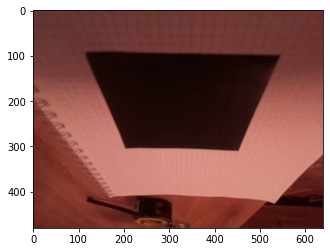

In [2]:
camera = False

if camera:
    cam = cv2.VideoCapture(0)
    cam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    _, img = cam.read()
    cam.release()
else:
    img_path = '/home/michal/robots/hex/src/line_detection/line_detection/calib.jpg'
    img = cv2.imread(img_path)
plt.imshow(img)
plt.savefig('/home/michal/studia/inz/imgs/calib_orig.png', dpi=300)

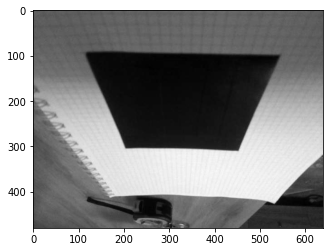

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='binary_r')
plt.savefig('/home/michal/studia/inz/imgs/calib_gray.png', dpi=300)

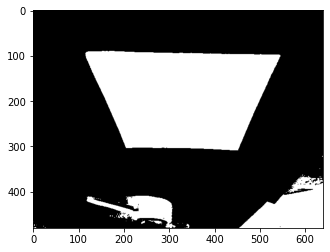

In [4]:
_, bw = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bw, cmap='binary_r')
plt.savefig('/home/michal/studia/inz/imgs/calib_threshold.png', dpi=300)

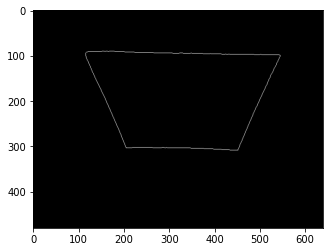

In [5]:
output = np.zeros((480, 640), dtype=np.uint8)
cont, hier = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
c = max(cont, key=cv2.contourArea)
cv2.drawContours(output, [c], -1, 1, thickness=1)
# cv2.fillPoly(output, c, color=(255, 0, 0))
plt.imshow(output, cmap='binary_r')
plt.savefig('/home/michal/studia/inz/imgs/calib_cont.png', dpi=300)

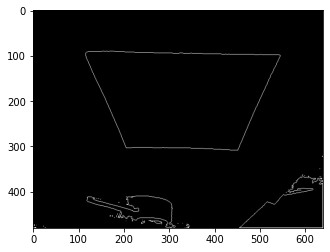

In [9]:
output = np.zeros((480, 640), dtype=np.uint8)
cv2.drawContours(output, cont, -1, 1, thickness=1)
plt.imshow(output, cmap='binary_r')
plt.savefig('/home/michal/studia/inz/imgs/calib_all_cont.png', dpi=300)

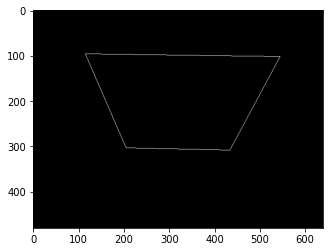

In [6]:
eps = 0.1 * cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, eps, True)
output = np.zeros((480, 640), dtype=np.uint8)
cv2.drawContours(output, [approx], -1, 1, thickness=1)

plt.imshow(output, cmap='binary_r')
plt.savefig('/home/michal/studia/inz/imgs/calib_cont_simple.png', dpi=300)

In [7]:
def order_points(points):
    rect = np.zeros((4, 2), dtype="float32")

    s = points.sum(axis=1)
    rect[0] = points[np.argmin(s)]
    rect[2] = points[np.argmax(s)]

    diff = np.diff(points, axis=1)
    rect[1] = points[np.argmin(diff)]
    rect[3] = points[np.argmax(diff)]

    return rect

In [8]:
dst = np.array([
    [150, -50],
    [150, 50],
    [250, 50],
    [250, -50]
], dtype='float32')

# dst = np.array([
#     [0.150, -0.050],
#     [0.150, 0.050],
#     [0.250, 0.050],
#     [0.250, -0.050],
# ], dtype='float32')
src = approx.reshape((4, 2)).astype('float32')
src = order_points(src)

M = cv2.getPerspectiveTransform(src, dst)
M

array([[ 5.70452501e-03, -6.75229893e-02,  1.29731754e+02],
       [ 1.93568283e-01,  8.65877868e-03, -6.43934512e+01],
       [ 5.80038014e-05, -1.88159708e-03,  1.00000000e+00]])

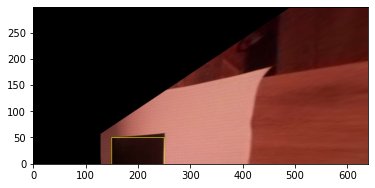

In [26]:
# gle = dst.reshape((4, 1, 2)).astype('int32')



warped = cv2.warpPerspective(img, M, (640, 300))
cv2.drawContours(warped, [gle], -1, (255, 255, 0), thickness=1)
plt.imshow(warped, cmap='binary_r')
plt.gca().invert_yaxis()
plt.savefig('/home/michal/studia/inz/sdi/trans.png', dpi=300)

In [22]:
gha = c.astype("float64")
tranf = cv2.perspectiveTransform(gha, M)

In [50]:
tranf[0][0]

array([148.33329556, -40.73006347])